In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Análisis exploratorio de los datos 

### Dataset de inmuebles en alquiler 

In [24]:
import limpieza
df_alquiler = limpieza.df_transformado

In [25]:
df_alquiler.describe()

,bathrooms,latitude,longitude,price,rooms,size,exterior_0,exterior_1,floor_1,floor_2,floor_3,floor_4,floor_high,floor_en,property_chalet,property_duplex,property_penthouse,property_studio,status_renew
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,1.492228,37.385422,-5.981176,1127.755181,2.472798,92.138601,0.066062,0.892487,0.253886,0.218912,0.133420,0.094560,0.133420,0.016839,0.014249,0.036269,0.038860,0.037565,0.003886
std,0.666946,0.014262,0.020962,507.315639,1.137971,42.616380,0.248552,0.309965,0.435515,0.413777,0.340248,0.292795,0.340248,0.128753,0.118591,0.187081,0.193387,0.190264,0.062257
min,1.000000,37.317480,-6.014263,450.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.377436,-5.996142,825.000000,2.000000,65.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,37.386490,-5.984941,990.000000,3.000000,83.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,37.394557,-5.970560,1207.500000,3.000000,105.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,37.426786,-5.911846,4950.000000,7.000000,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df_alquiler.describe(include='object')

,hasLift
count,772
unique,2
top,True
freq,524


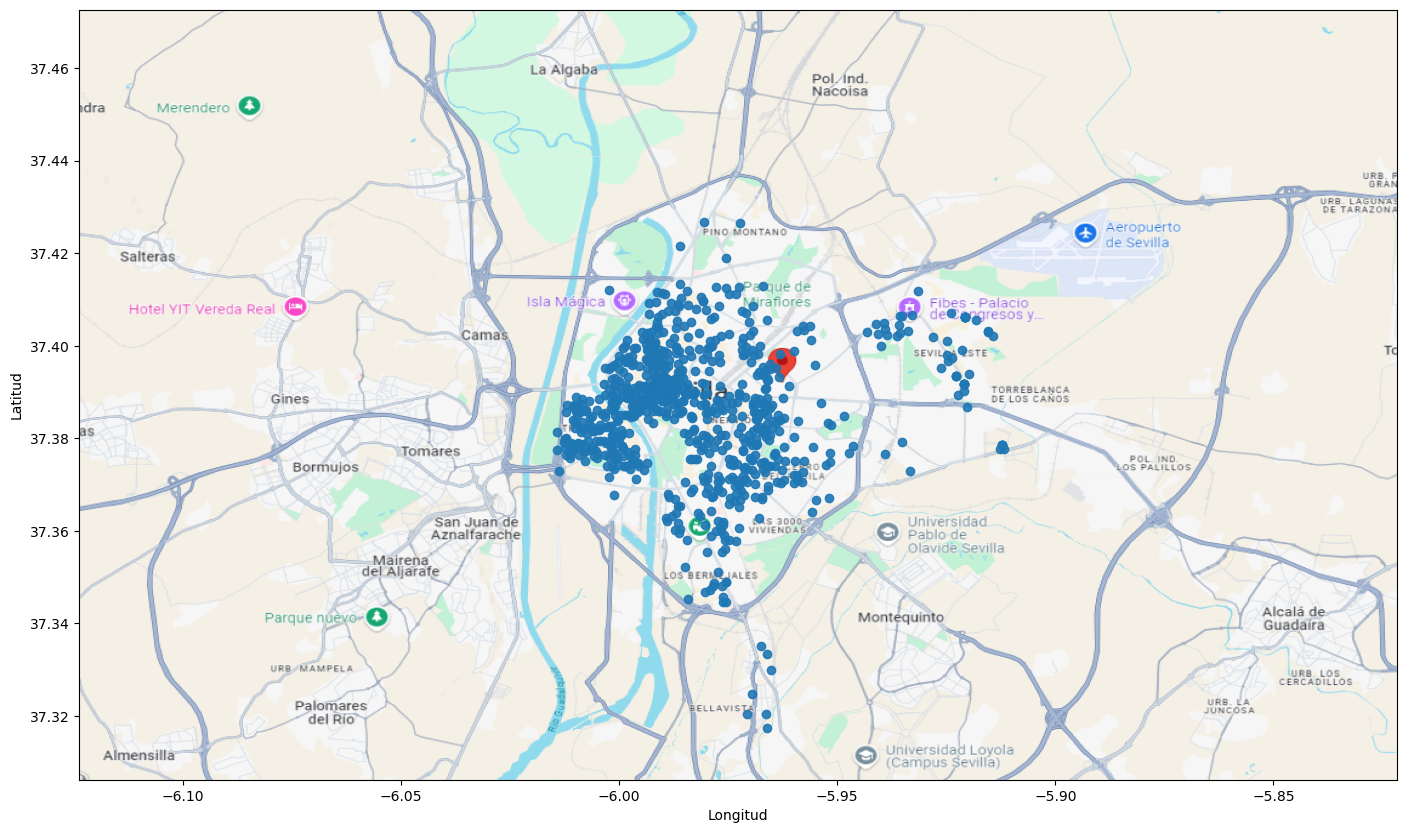

In [47]:
# Mapa de inmuebles en alquiler

min_latitude = 37.3062494269371  # Latitud de la esquina inferior izquierda
min_longitude = -6.1237252819805725# Longitud de la esquina inferior izquierda
width_m = 1000  # Ancho de la imagen en metros
height_m = 1000  # Alto de la imagen en metros

# Conversiones aproximadas de metros a grados en la ubicación específica
meters_per_deg_lat = 111320  # Aproximado para latitudes cercanas al ecuador
meters_per_deg_lon = 111320 * np.cos(np.radians(min_latitude))  # Ajuste según la latitud

# Calcular las coordenadas de la esquina superior derecha
max_latitude = 37.47259301974194
max_longitude = -5.82177073842795

# Cargar la imagen de Google Maps
imagen_google_maps = Image.open('mapasev.png')

# Mostrar la imagen como fondo
fig, ax = plt.subplots(figsize=(17, 10))
ax.imshow(imagen_google_maps, extent=[min_longitude, max_longitude, min_latitude, max_latitude], aspect='auto')

# Superponer los puntos
x, y = df_alquiler.longitude.values, df_alquiler.latitude.values
scatter = ax.scatter(x, y, alpha=0.9)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Sacamos los histogramas de las variables referentes a habitaciones, baños y alturas

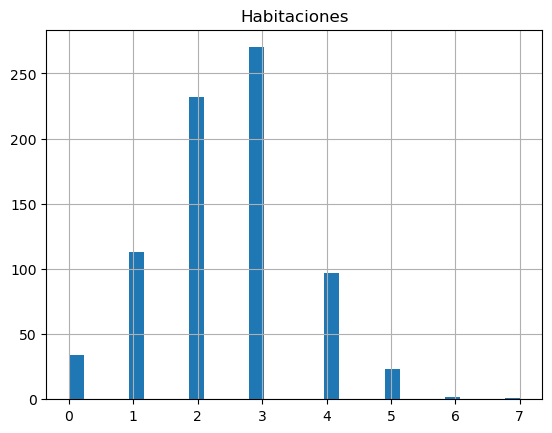

In [72]:
df_alquiler['rooms'].hist(bins=30)
plt.title('Habitaciones')
plt.show()

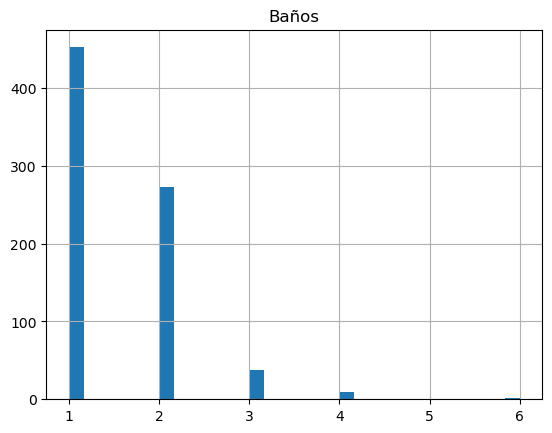

In [73]:
df_alquiler['bathrooms'].hist(bins=30)
plt.title('Baños')
plt.show()

In [58]:
# Creamos una nueva variable para poder analizar las alturas de los inmuebles que son pisos

df_alquiler['floor_type'] = 'Bajo/Semisótano'  # Asignar valor por defecto
 
df_alquiler.loc[df_alquiler['floor_1'] == 1, 'floor_type'] = 'Primer Piso'
df_alquiler.loc[df_alquiler['floor_2'] == 1, 'floor_type'] = 'Segundo Piso'
df_alquiler.loc[df_alquiler['floor_3'] == 1, 'floor_type'] = 'Tercer Piso'
df_alquiler.loc[df_alquiler['floor_4'] == 1, 'floor_type'] = 'Cuarto Piso'
df_alquiler.loc[df_alquiler['floor_high'] == 1, 'floor_type'] = 'Piso Alto'
df_alquiler.loc[df_alquiler['floor_en'] == 1, 'floor_type'] = 'Entrepiso'


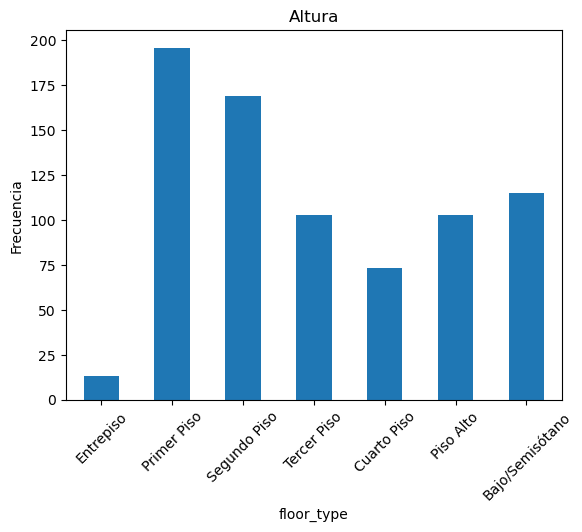

In [63]:
# Definir el orden deseado para la columna 'floor_type'
orden = ['Entrepiso', 'Primer Piso', 'Segundo Piso', 'Tercer Piso', 'Cuarto Piso', 'Piso Alto', 'Bajo/Semisótano']

# Convertir 'floor_type' en una variable categórica con un orden específico
df_alquiler['floor_type'] = pd.Categorical(df_alquiler['floor_type'], categories=orden, ordered=True)

# Graficar el histograma respetando el orden
df_alquiler['floor_type'].value_counts(sort=False).plot(kind='bar')

# Agregar título y mostrar el gráfico
plt.title('Altura')
# plt.xlabel('Tipos de piso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Girar las etiquetas del eje x si es necesario
plt.show()

In [89]:
# Creamos una nueva variable para poder analizar los tipos de inmuebles
df_alquiler['propertyType'] = 'Piso'  # Asignar valor por defecto
 
df_alquiler.loc[df_alquiler['property_chalet'] == 1, 'propertyType'] = 'Chalet'
df_alquiler.loc[df_alquiler['property_duplex'] == 1, 'propertyType'] = 'Duplex'
df_alquiler.loc[df_alquiler['property_penthouse'] == 1, 'propertyType'] = 'Ático'
df_alquiler.loc[df_alquiler['property_studio'] == 1, 'propertyType'] = 'Estudio'


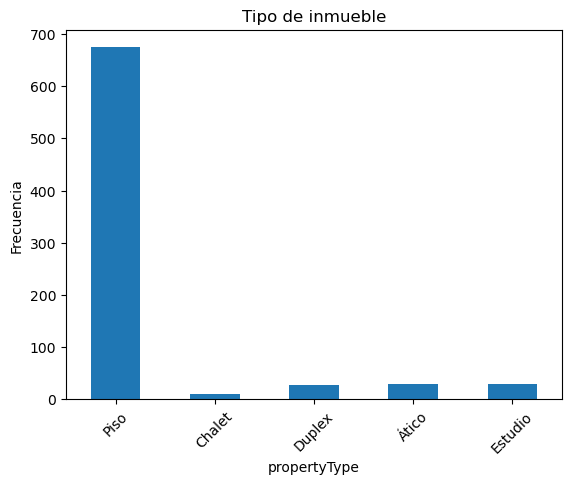

In [90]:
orden = ['Piso', 'Chalet', 'Duplex', 'Ático', 'Estudio']

# Convertir 'floor_type' en una variable categórica con un orden específico
df_alquiler['propertyType'] = pd.Categorical(df_alquiler['propertyType'], categories=orden, ordered=True)

# Graficar el histograma respetando el orden
df_alquiler['propertyType'].value_counts(sort=False).plot(kind='bar')

# Agregar título y mostrar el gráfico
plt.title('Tipo de inmueble')
# plt.xlabel('Tipos de piso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Girar las etiquetas del eje x si es necesario
plt.show()

Dibujamos los boxplots de las variables continuas, como 'price', 'size' 

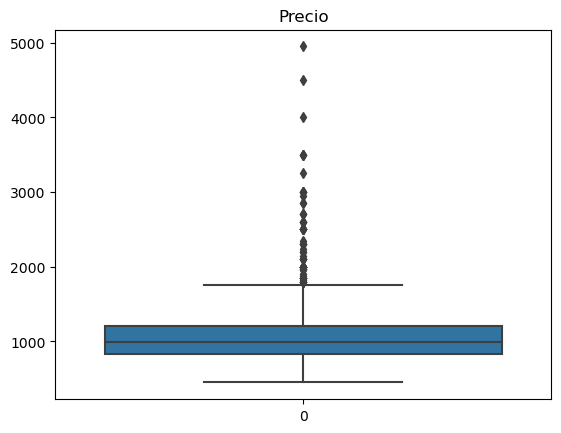

In [74]:
sns.boxplot(data=df_alquiler['price'])
plt.title('Precio')
plt.show()

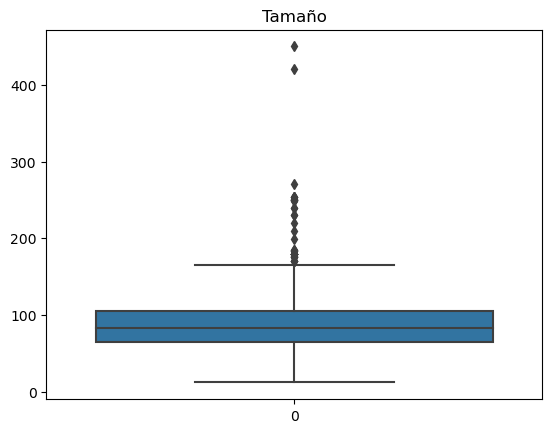

In [75]:
sns.boxplot(data=df_alquiler['size'])
plt.title('Tamaño')
plt.show()

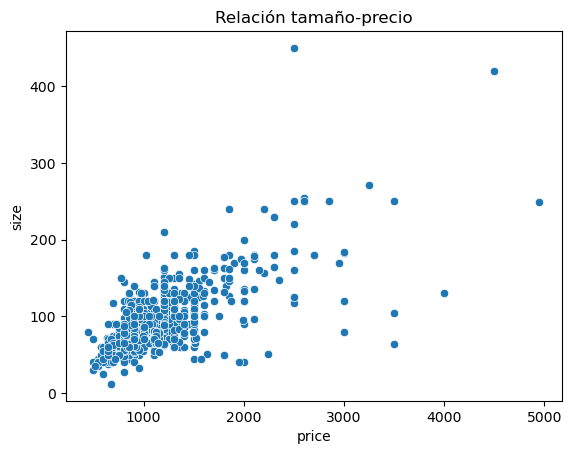

In [96]:
sns.scatterplot(x='price', y='size', data=df_alquiler)
plt.title('Relación tamaño-precio')
plt.show()


Matriz de correlación con las principales variables

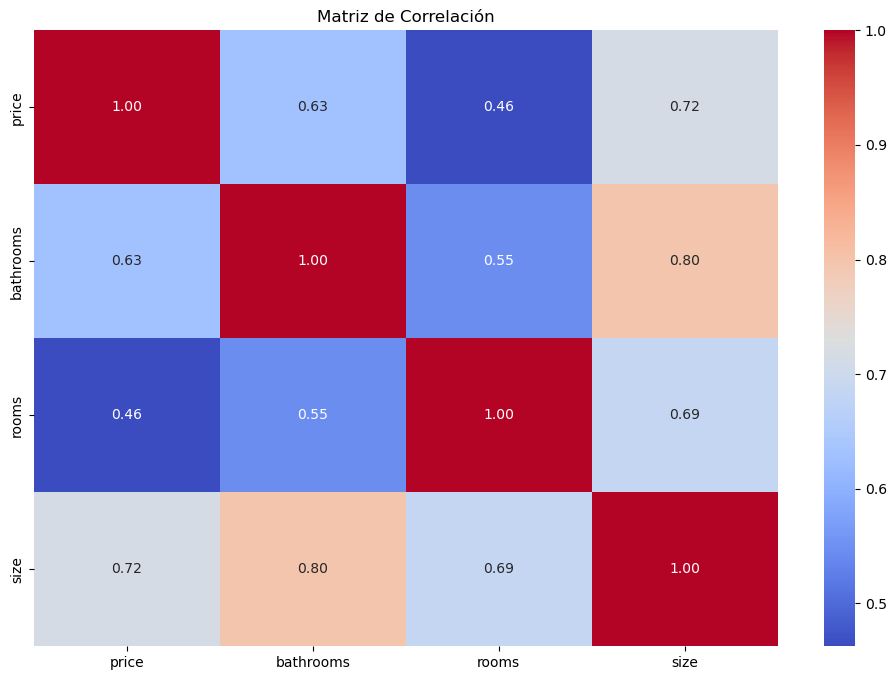

In [108]:
# Seleccionar las columnas relevantes
variables_interes = ['price', 'bathrooms', 'rooms', 'size']

# Crear un nuevo DataFrame solo con esas columnas
df_seleccion = df_alquiler[variables_interes]

# Codificar las variables categóricas ('propertyType' y 'floor_type') usando One-Hot Encoding
# df_seleccion = pd.get_dummies(df_seleccion, columns=['propertyType', 'floor_type'], drop_first=True)

# Calcular la matriz de correlación
matriz_correlacion = df_seleccion.corr()

# Mostrar la matriz de correlación
# print(matriz_correlacion)


plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


## Dataset de inmuebles en venta 

In [31]:
import limpieza_compra
df_venta = limpieza_compra.df_transformado

Las columnas de alquiler y compra son las mismas? -->  True
Hay 9 registros duplicados en df. Se muestran en el df_duplicados
Se han eliminado los duplicados
Análisis de la columna bathrooms
Valores únicos:
['0', '1', '12', '16', '2', '24', '3', '4', '5', '6', '7', '8']

Conteo de valores:
bathrooms
2     1417
1     1363
3      395
4      109
5       31
6       12
7        7
0        4
8        4
12       3
24       1
16       1
Name: count, dtype: int64

Resumen:
count     3347
unique      12
top          2
freq      1417
Name: bathrooms, dtype: object

Valores nulos: 0

--------------------------------------------------

Análisis de la columna exterior
Valores únicos:
['False', 'True', 'nan']

Conteo de valores:
exterior
True     2271
False     167
Name: count, dtype: int64

Resumen:
count     2438
unique       2
top       True
freq      2271
Name: exterior, dtype: object

Valores nulos: 909

--------------------------------------------------

Análisis de la columna floor
Valores úni

In [34]:
df_venta.describe()

,bathrooms,latitude,longitude,price,rooms,size,exterior_0,exterior_1,floor_1,floor_2,floor_3,floor_4,floor_high,floor_en,property_chalet,property_duplex,property_penthouse,property_studio,status_renew
count,3194.000000,3194.000000,3194.000000,3.194000e+03,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000
mean,1.827176,37.385214,-5.970079,3.359687e+05,3.110833,130.427051,0.048842,0.691296,0.202880,0.172198,0.120225,0.067314,0.104571,0.012837,0.180651,0.043206,0.025360,0.008453,0.132436
std,0.880345,0.018633,0.027645,3.129591e+05,1.343666,166.022004,0.215570,0.462031,0.402207,0.377611,0.325276,0.250604,0.306048,0.112587,0.384789,0.203352,0.157241,0.091567,0.339017
min,1.000000,37.314740,-6.014347,1.380000e+04,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,37.377545,-5.990097,1.499225e+05,2.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,37.386501,-5.976040,2.500000e+05,3.000000,104.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,37.397403,-5.956911,4.100000e+05,4.000000,149.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,37.439820,-5.872393,3.500000e+06,12.000000,7985.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_venta.describe(include='object')

,hasLift,newDevelopment
count,3194,3194
unique,2,2
top,True,False
freq,1782,2900


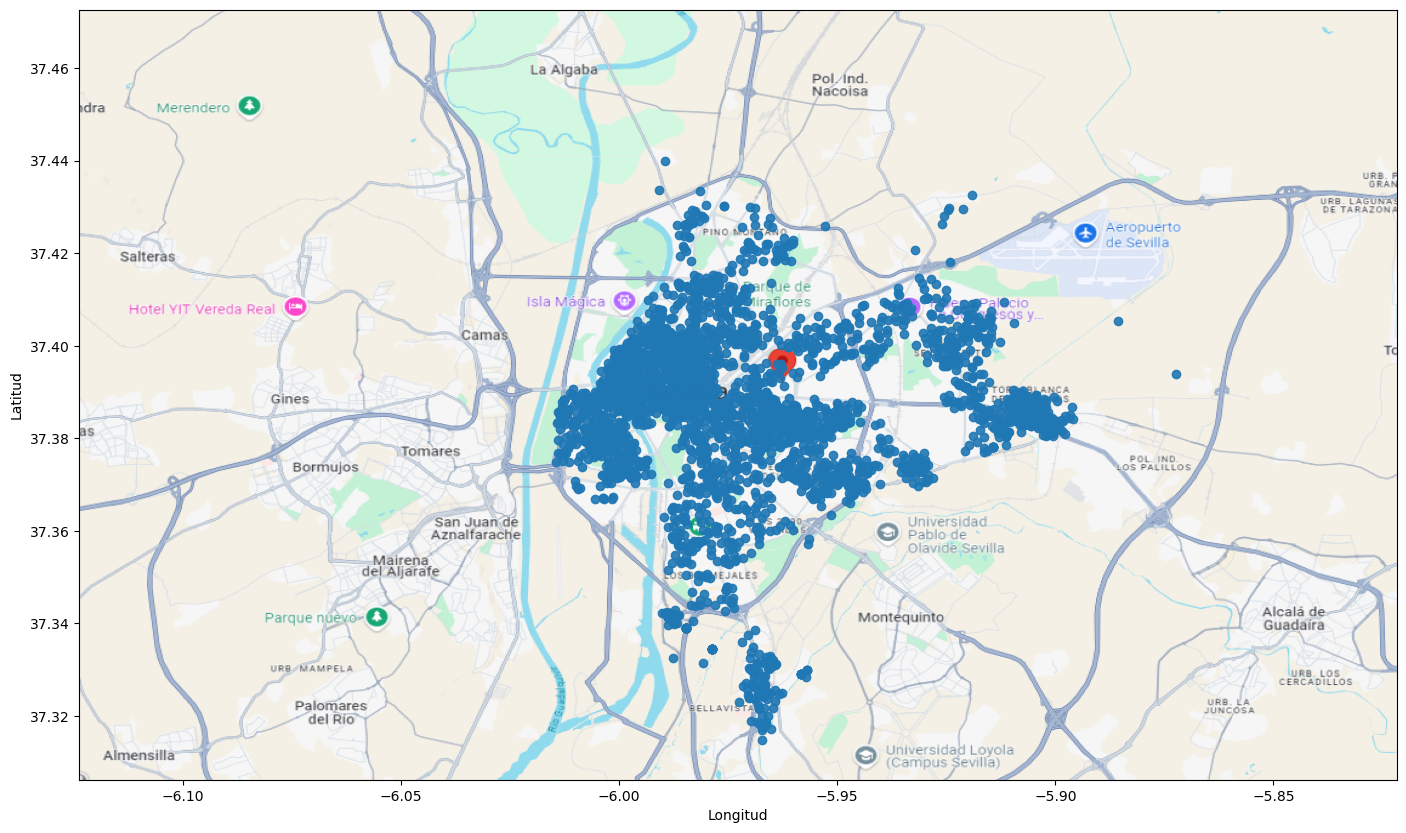

In [46]:
# Mapa de inmuebles en estado de compra 

min_latitude = 37.3062494269371  # Latitud de la esquina inferior izquierda
min_longitude = -6.1237252819805725# Longitud de la esquina inferior izquierda
width_m = 1000  # Ancho de la imagen en metros
height_m = 1000  # Alto de la imagen en metros

# Conversiones aproximadas de metros a grados en la ubicación específica
meters_per_deg_lat = 111320  # Aproximado para latitudes cercanas al ecuador
meters_per_deg_lon = 111320 * np.cos(np.radians(min_latitude))  # Ajuste según la latitud

# Calcular las coordenadas de la esquina superior derecha
max_latitude = 37.47259301974194
max_longitude = -5.82177073842795

# Cargar la imagen de Google Maps
imagen_google_maps = Image.open('mapasev.png')

# Mostrar la imagen como fondo
fig, ax = plt.subplots(figsize=(17, 10))
ax.imshow(imagen_google_maps, extent=[min_longitude, max_longitude, min_latitude, max_latitude], aspect='auto')

# Superponer los puntos
x, y = df_venta.longitude.values, df_venta.latitude.values
scatter = ax.scatter(x, y, alpha=0.9)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

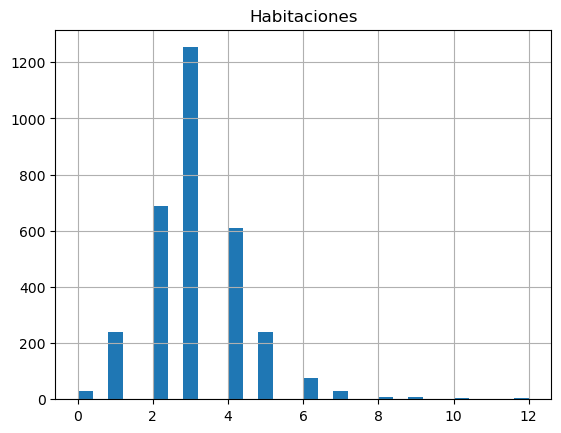

In [76]:
df_venta['rooms'].hist(bins=30)
plt.title('Habitaciones')
plt.show()

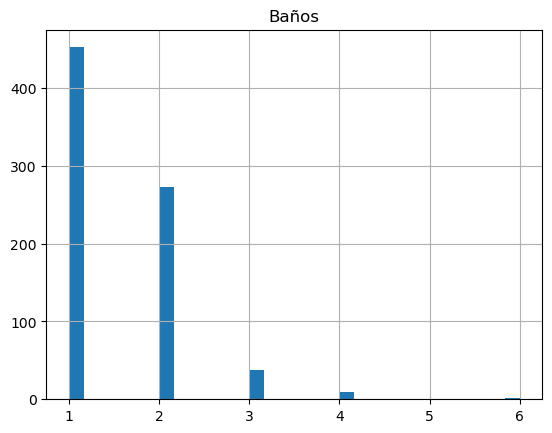

In [77]:
df_alquiler['bathrooms'].hist(bins=30)
plt.title('Baños')
plt.show()

In [53]:
df_venta = df_venta[(df_venta['size'] <= 2000)]

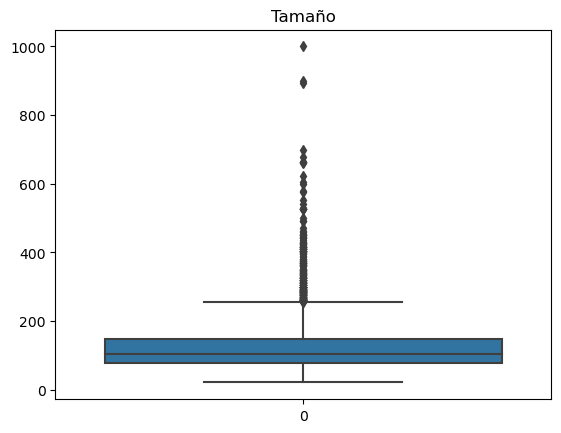

In [79]:
sns.boxplot(data=df_venta['size'])
plt.title('Tamaño')
plt.show()

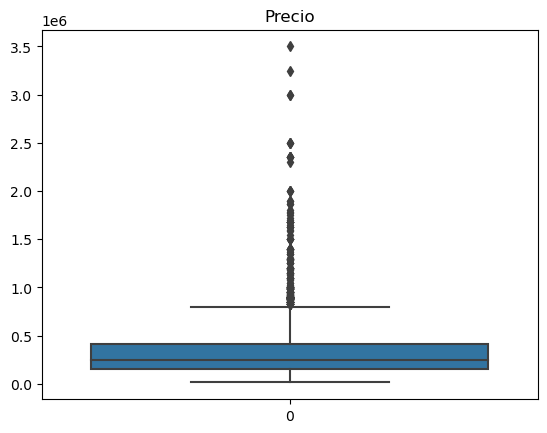

In [78]:
sns.boxplot(data=df_venta['price'])
plt.title('Precio')
plt.show()


Creamos una nueva variable para analizar las alturas

In [81]:
# Creamos una nueva variable para poder analizar las alturas de los inmuebles

df_venta['floor_type'] = 'Bajo/Semisótano'  # Asignar valor por defecto
 
df_venta.loc[df_venta['floor_1'] == 1, 'floor_type'] = 'Primer Piso'
df_venta.loc[df_venta['floor_2'] == 1, 'floor_type'] = 'Segundo Piso'
df_venta.loc[df_venta['floor_3'] == 1, 'floor_type'] = 'Tercer Piso'
df_venta.loc[df_venta['floor_4'] == 1, 'floor_type'] = 'Cuarto Piso'
df_venta.loc[df_venta['floor_high'] == 1, 'floor_type'] = 'Piso Alto'
df_venta.loc[df_venta['floor_en'] == 1, 'floor_type'] = 'Entrepiso'


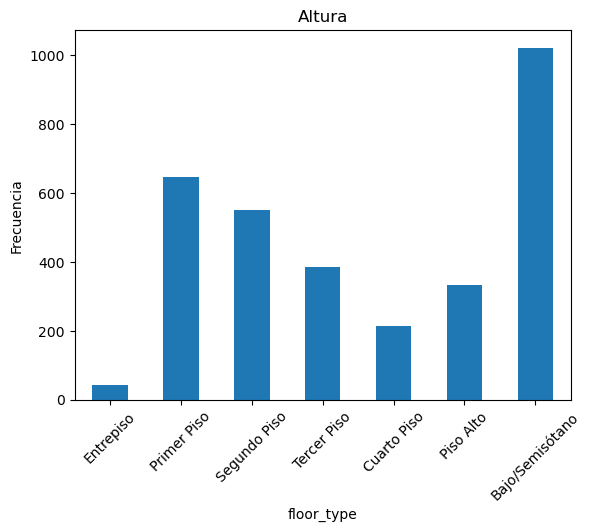

In [83]:
# Definir el orden deseado para la columna 'floor_type'
orden = ['Entrepiso', 'Primer Piso', 'Segundo Piso', 'Tercer Piso', 'Cuarto Piso', 'Piso Alto', 'Bajo/Semisótano']

# Convertir 'floor_type' en una variable categórica con un orden específico
df_venta['floor_type'] = pd.Categorical(df_venta['floor_type'], categories=orden, ordered=True)

# Graficar el histograma respetando el orden
df_venta['floor_type'].value_counts(sort=False).plot(kind='bar')

# Agregar título y mostrar el gráfico
plt.title('Altura')
# plt.xlabel('Tipos de piso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Girar las etiquetas del eje x si es necesario
plt.show()

In [91]:
# Creamos una nueva variable para poder analizar los tipos de inmuebles
df_venta['propertyType'] = 'Piso'  # Asignar valor por defecto
 
df_venta.loc[df_venta['property_chalet'] == 1, 'propertyType'] = 'Chalet'
df_venta.loc[df_venta['property_duplex'] == 1, 'propertyType'] = 'Duplex'
df_venta.loc[df_venta['property_penthouse'] == 1, 'propertyType'] = 'Ático'
df_venta.loc[df_venta['property_studio'] == 1, 'propertyType'] = 'Estudio'


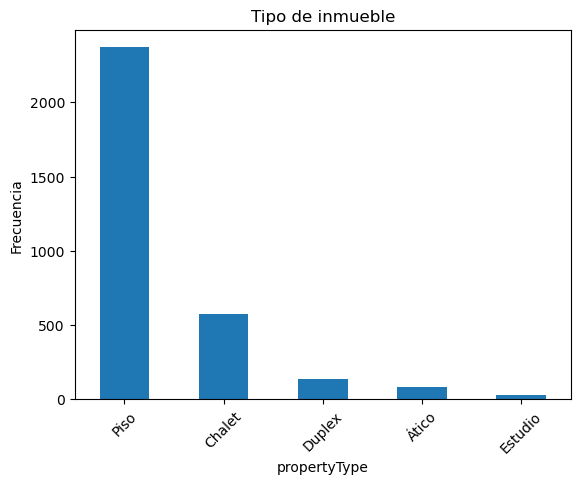

In [92]:
orden = ['Piso', 'Chalet', 'Duplex', 'Ático', 'Estudio']

# Convertir 'floor_type' en una variable categórica con un orden específico
df_venta['propertyType'] = pd.Categorical(df_venta['propertyType'], categories=orden, ordered=True)

# Graficar el histograma respetando el orden
df_venta['propertyType'].value_counts(sort=False).plot(kind='bar')

# Agregar título y mostrar el gráfico
plt.title('Tipo de inmueble')
# plt.xlabel('Tipos de piso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Girar las etiquetas del eje x si es necesario
plt.show()

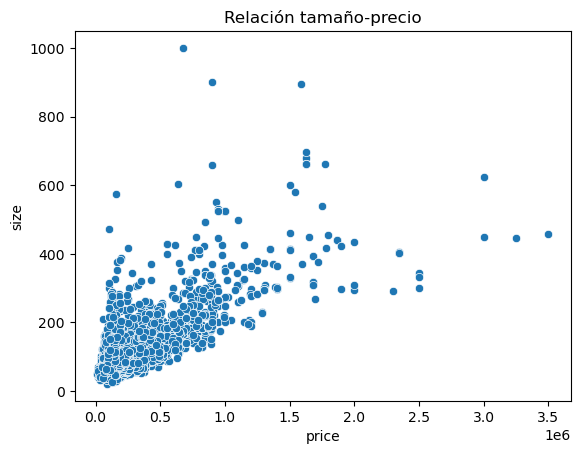

In [95]:
sns.scatterplot(x='price', y='size', data=df_venta)
plt.title('Relación tamaño-precio')
plt.show()


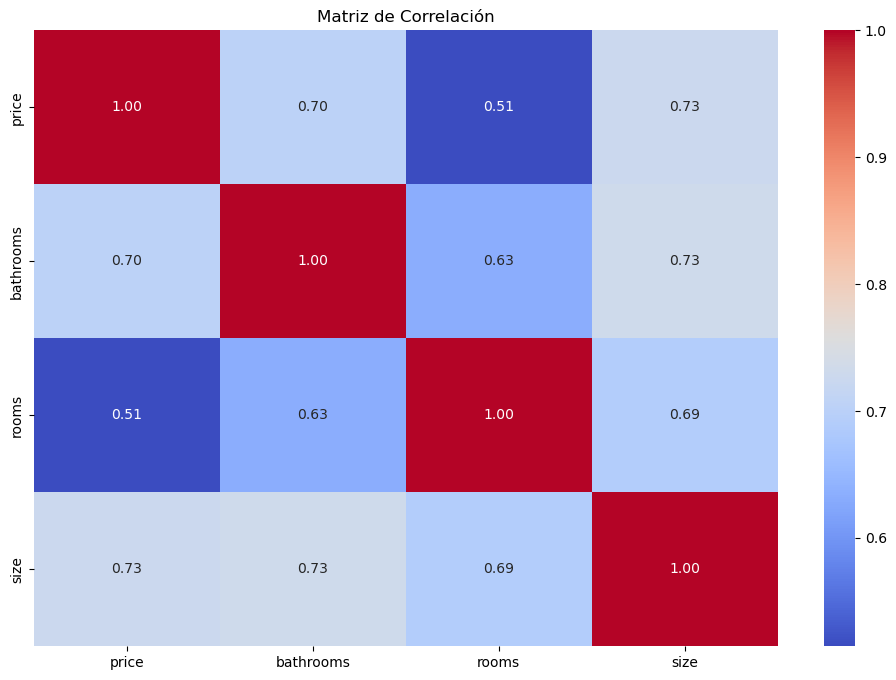

In [109]:
# Seleccionar las columnas relevantes
variables_interes = ['price', 'bathrooms', 'rooms', 'size']

# Crear un nuevo DataFrame solo con esas columnas
df_seleccion = df_venta[variables_interes]

# Codificar las variables categóricas ('propertyType' y 'floor_type') usando One-Hot Encoding
# df_seleccion = pd.get_dummies(df_seleccion, columns=['propertyType', 'floor_type'], drop_first=True)

# Calcular la matriz de correlación
matriz_correlacion = df_seleccion.corr()

# Mostrar la matriz de correlación
# print(matriz_correlacion)


plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
